# Final project : House Prices ( Advanced Regression Techniques )

## Data analysis and features extraction :

### Data preview 

First , we need to import all the libraries that we need and load the data . 

In [137]:
#import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,6)
%matplotlib inline

In [138]:
train = pd.read_csv('Dataset/train.csv')
test  = pd.read_csv('Dataset/test.csv')

print("Test samples = {} , Train samples = {} ".format(len(test),len(train)))

Test samples = 1459 , Train samples = 1460 


In [139]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


So , we are collecting about 2919 samples which only 1460 of them is for training our model.
Then , we must see the data missing (NaN) : 

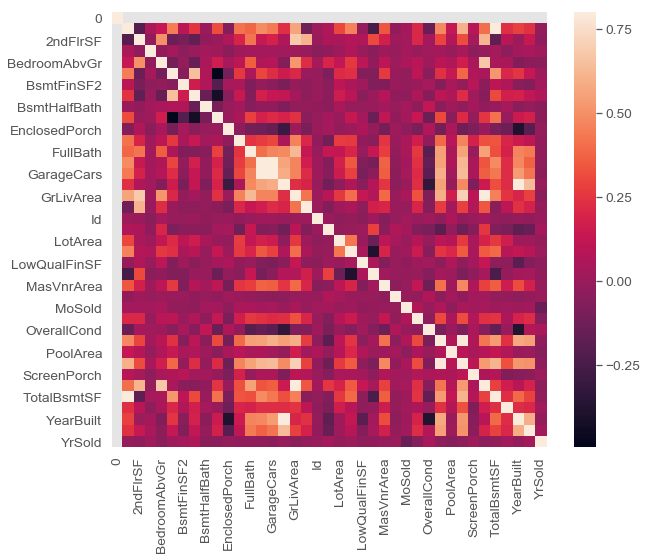

In [140]:
train_labels = train["SalePrice"]
corrmat = pd.concat([train,train_labels],keys=["train","SalePrice"]).corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

>- In this code , we print the correlation matrix of the top 10 features which are strongly correlated with the SalePrice.

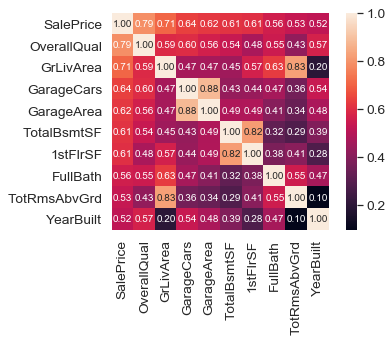

In [141]:
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

 >- ### Removing the outliers :

>- In this part, we will romove the outliers from our train data in order to estimate our test data more precisely.
>- In fact, we will remove these outliers from our train data with respect to the sale price with the dependencies to the top 10 correlated features with the sale price.

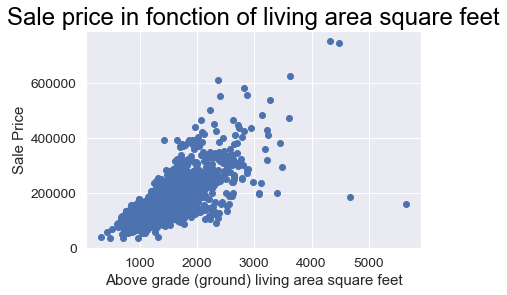

In [142]:
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.title("Sale price in fonction of living area square feet",color="black",fontsize=24)
plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('Sale Price')
plt.show()

Here , we must eliminate the outliers from our data to predict better our test data. 

In [143]:
train = train[train['GrLivArea']<4000] 
train = train[train['SalePrice']<600000] 

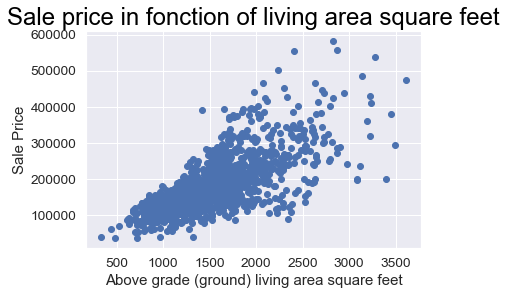

In [144]:
plt.scatter(x = train['GrLivArea'], y= train["SalePrice"])
plt.title("Sale price in fonction of living area square feet",color="black",fontsize=24)
plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('Sale Price')
plt.show()

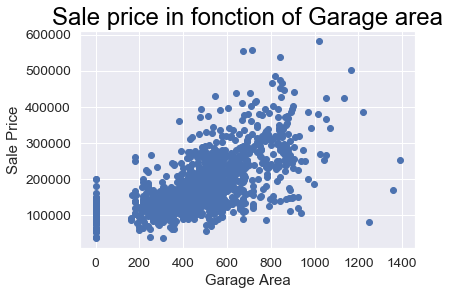

In [145]:
plt.scatter(x = train['GarageArea'], y= train["SalePrice"])
plt.title("Sale price in fonction of Garage area",color="black",fontsize=24)
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.show()

In [146]:
train = train[train["GarageArea"]<1200]
train = train[train["SalePrice"]<500000 ]

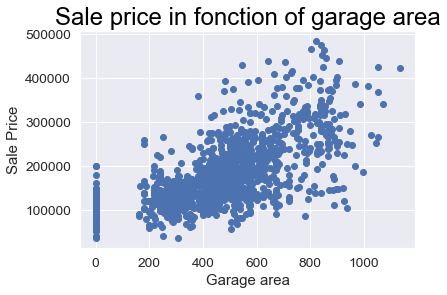

In [147]:
plt.scatter(x = train['GarageArea'], y= train["SalePrice"])
plt.title("Sale price in fonction of garage area",color="black",fontsize=24)
plt.xlabel('Garage area')
plt.ylabel('Sale Price')
plt.show()

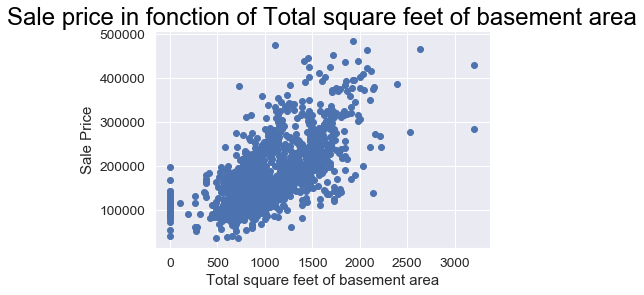

In [148]:
plt.scatter(x = train['TotalBsmtSF'], y= train["SalePrice"])
plt.title("Sale price in fonction of Total square feet of basement area",color="black",fontsize=24)
plt.xlabel('Total square feet of basement area')
plt.ylabel('Sale Price')
plt.show()

In [149]:
train = train[train["TotalBsmtSF"]<2500] 

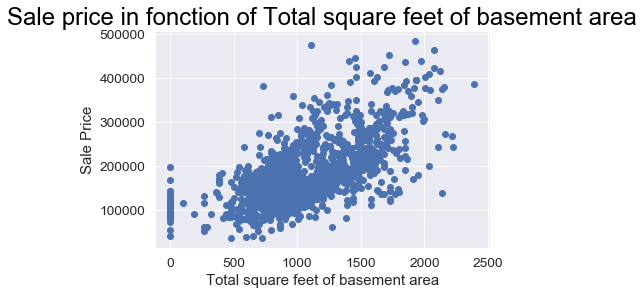

In [150]:
plt.scatter(x = train['TotalBsmtSF'], y= train["SalePrice"])
plt.title("Sale price in fonction of Total square feet of basement area",color="black",fontsize=24)
plt.xlabel('Total square feet of basement area')
plt.ylabel('Sale Price')
plt.show()

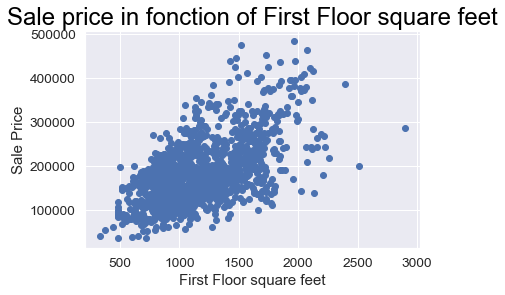

In [151]:
plt.scatter(x = train['1stFlrSF'], y= train["SalePrice"])
plt.title("Sale price in fonction of First Floor square feet",color="black",fontsize=24)
plt.xlabel('First Floor square feet')
plt.ylabel('Sale Price')
plt.show()

In [152]:
train = train[train['1stFlrSF']<2300] 

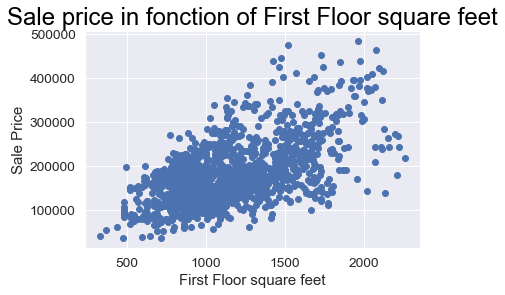

In [153]:
plt.scatter(x = train['1stFlrSF'], y= train["SalePrice"])
plt.title("Sale price in fonction of First Floor square feet",color="black",fontsize=24)
plt.xlabel('First Floor square feet')
plt.ylabel('Sale Price')
plt.show()

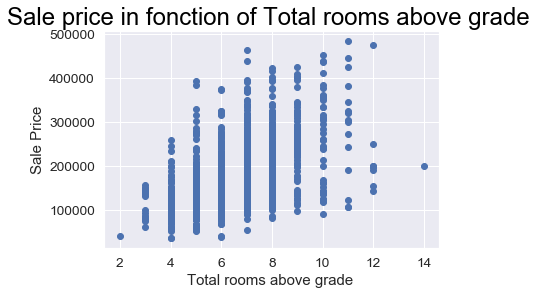

In [154]:
plt.scatter(x = train['TotRmsAbvGrd'], y= train["SalePrice"])
plt.title("Sale price in fonction of Total rooms above grade ",color="black",fontsize=24)
plt.xlabel('Total rooms above grade ')
plt.ylabel('Sale Price')
plt.show()

In [155]:
train = train[train["TotRmsAbvGrd"]<14]
train = train[train["TotRmsAbvGrd"]>2]

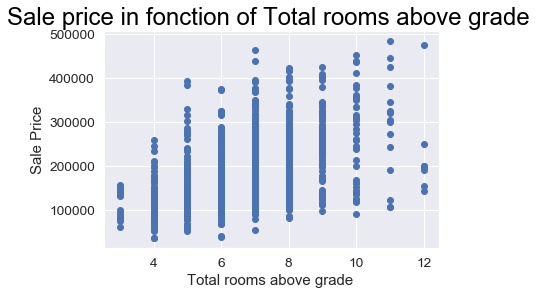

In [156]:
plt.scatter(x = train['TotRmsAbvGrd'], y= train["SalePrice"])
plt.title("Sale price in fonction of Total rooms above grade ",color="black",fontsize=24)
plt.xlabel('Total rooms above grade ')
plt.ylabel('Sale Price')
plt.show()

>- ### Controling our missing data 

First of all, We will merge our train data and our test data into one data frame which we will call "Data" in order to apply to them the necessary treatment and apply also the technic of the principal components analysis (PCA) to reduce their size in order to boost our algorithm of prediction.

In [157]:
Data = pd.concat([train[train.columns.values[:-1]],test])
train_labels = train["SalePrice"]

print("Samples = {}  , Features = {} ".format(*Data.shape))

Samples = 2895  , Features = 80 


>- Here, we will count the number of missing data in each feature :

In [158]:
# Count the number of NaNs each column has.
nans=pd.isnull(Data).sum()
nans[nans>600]

Alley          2698
FireplaceQu    1417
PoolQC         2887
Fence          2326
MiscFeature    2791
dtype: int64

In [159]:
#Count the number of NaNs each column has
nans = pd.concat([train.isnull().sum(), train.isnull().sum() / train.shape[0], test.isnull().sum(), test.isnull().sum() / test.shape[0]], axis=1, keys=['Train', 'Percentage', 'Test', 'Percentage'])
print(nans[nans.sum(axis=1) > len(Data)*.2])

             Train  Percentage    Test  Percentage
Alley         1346    0.937326  1352.0    0.926662
Fence         1157    0.805710  1169.0    0.801234
FireplaceQu    687    0.478412   730.0    0.500343
MiscFeature   1383    0.963092  1408.0    0.965045
PoolQC        1431    0.996518  1456.0    0.997944


>- Besides , we must clean our data from those features who have more than 40% information loss.Also , we delete the feature 'Id' because it isn't important.

In [160]:
Data.drop(['Id', 'MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley'], axis=1, inplace=True)

Here , we change the features that aren't numbers to integers by indexing them from 1 to the cardinal of the feature values possibles and by replacing the missing values by the most frequent value in each feature column.

First of all , we will implement a function "isnan()" which detect the missing values :

In [161]:
def isnan(value):
  try:
      import math
      return math.isnan(float(value))
  except:
      return False

Then , we will create a dictionary which contain two elements with following key-value pair and finally we iterate using for loop through all string columns of DataFrame and replace the values wherever the keys are found.

In [162]:
set_features = [ list(set(Data[i])) for i in Data.columns.values if type(Data[i].values[0])==str ]
nan_remove = [i.remove(np.nan) for i in set_features if np.nan in i ]
replace_ = { i[j]:j+1 for i in set_features for j in range(len(i)) }

for i in Data.columns.values : 
    if type(Data[i].values[0])==str : 
        for j in range(len(Data[i].values)) : 
                if not isnan(Data[i].values[j]) : 
                    Data[i].values[j] = replace_[Data[i].values[j]]     

Data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,1,65.0,8450,1,1,1,1,4,3,...,61,0,0,0,0,0,2,2008,3,4
1,20,1,80.0,9600,1,1,1,1,2,3,...,0,0,0,0,0,0,5,2007,3,4
2,60,1,68.0,11250,1,3,1,1,4,3,...,42,0,0,0,0,0,9,2008,3,4
3,70,1,60.0,9550,1,3,1,1,1,3,...,35,272,0,0,0,0,2,2006,3,6
4,60,1,84.0,14260,1,3,1,1,2,3,...,84,0,0,0,0,0,12,2008,3,4


>- Here, we will replace the missing values by the most frequent value in each feature of our data using a standard function :

In [163]:
columns = Data.columns # Store the names of our features in a list

imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
Data = imp.fit_transform(Data)

Data = pd.DataFrame(Data) 
Data.columns = columns
Data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60.0,1.0,65.0,8450.0,1.0,1.0,1.0,1.0,4.0,3.0,...,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,3.0,4.0
1,20.0,1.0,80.0,9600.0,1.0,1.0,1.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,3.0,4.0
2,60.0,1.0,68.0,11250.0,1.0,3.0,1.0,1.0,4.0,3.0,...,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,3.0,4.0
3,70.0,1.0,60.0,9550.0,1.0,3.0,1.0,1.0,1.0,3.0,...,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,3.0,6.0
4,60.0,1.0,84.0,14260.0,1.0,3.0,1.0,1.0,2.0,3.0,...,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,3.0,4.0


## Data visualisation 

>- Here , we will plot the histogram of our train labels in order to see their distrbution

skew is 1.197544819099735


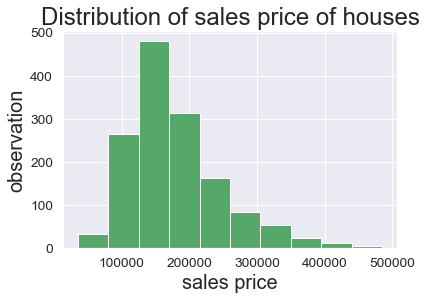

In [164]:
#analysing the distribution of sale price
print('skew is', train.SalePrice.skew())   
plt.hist(train['SalePrice'], color= 'g')

plt.title('Distribution of sales price of houses', fontsize = 24)
plt.ylabel('observation', fontsize = 20)
plt.xlabel('sales price', fontsize = 20)

plt.show()

>- In fact, we will apply to our train labels the logarithm function in order to reduce its skew

In [165]:
#log transforming sale price to transform it into gaussian distribution
target = np.log(train.SalePrice)

skew is -0.02331736477430191


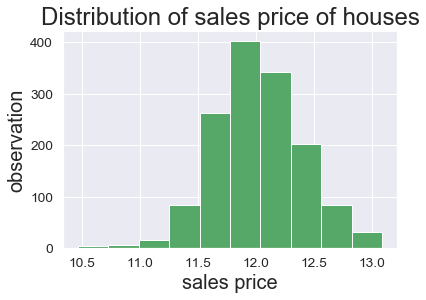

In [166]:
print('skew is', target.skew())
plt.hist(target, color= 'g')

plt.title('Distribution of sales price of houses', fontsize = 24)
plt.ylabel('observation', fontsize = 20)
plt.xlabel('sales price', fontsize = 20)

plt.show()

# Preprocessing

### Feature scaling

>- In this code, we will normalize our data frame in order to apply the PCA.

In [167]:
Data = StandardScaler().fit_transform(Data)         # feature scaling
Data = pd.DataFrame(Data)
Data.columns = columns 
Data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.065600,-0.497709,-0.119747,-0.210119,-0.061759,-0.741442,-0.306081,-0.018589,0.549707,-0.201728,...,0.206442,-0.359579,-0.103763,-0.285132,-0.057744,-0.089638,-1.556726,0.158280,-0.278106,0.115493
1,-0.876309,-0.497709,0.596116,-0.061660,-0.061759,-0.741442,-0.306081,-0.018589,-1.171659,-0.201728,...,-0.701048,-0.359579,-0.103763,-0.285132,-0.057744,-0.089638,-0.450691,-0.601623,-0.278106,0.115493
2,0.065600,-0.497709,0.023425,0.151346,-0.061759,1.251571,-0.306081,-0.018589,0.549707,-0.201728,...,-0.076219,-0.359579,-0.103763,-0.285132,-0.057744,-0.089638,1.024021,0.158280,-0.278106,0.115493
3,0.301078,-0.497709,-0.358369,-0.068115,-0.061759,1.251571,-0.306081,-0.018589,-2.032342,-0.201728,...,-0.180357,3.881745,-0.103763,-0.285132,-0.057744,-0.089638,-1.556726,-1.361525,-0.278106,2.093900
4,0.065600,-0.497709,0.787013,0.539922,-0.061759,1.251571,-0.306081,-0.018589,-1.171659,-0.201728,...,0.548610,-0.359579,-0.103763,-0.285132,-0.057744,-0.089638,2.130055,0.158280,-0.278106,0.115493


### PCA : dimensionality reduction

>- In order to reduce the number of our features , we will use the PCA technic .

In [168]:
pca = PCA(whiten=True)
pca.fit(Data) 
variance = pd.DataFrame(pca.explained_variance_ratio_)


In [169]:
pca = PCA(n_components=35)
pca.fit(Data)

Data_pca = pca.fit_transform(Data)   # here , we apply the pca 
variance_totale = pca.get_covariance().trace()      # The total variance of all the features that are numbers 

pca.fit(Data_pca)
variance_reduction = pca.get_covariance().trace()   # The partial variance of the 20 features that have the maximum covariance

print("The information that rests after applying the PCA is {} %".format(str(variance_reduction/variance_totale*100)[:5]))

The information that rests after applying the PCA is 77.66 %


>- Finally, we split the data into a training set and a test set. In fact, the train set will help us to train our model and optimising our parameters :

In [170]:
Train_ = Data[:len(train)]
Test_ = Data[len(train):]
X_train, X_test, y_train, y_test = train_test_split( Train_, target, test_size=0.22, random_state=42)

# Model of training : Linear regression 

>- Finally, we will run our training model to our training data which is the linear regression model :

In [171]:
reg = LinearRegression().fit(X_train, y_train)

>- Here : we will predict the sale price of our test data which comes from splitting the train data into train set and a test set and print the accuracy of our model :

In [172]:
prediction = reg.predict(X_test)

print("The regression score function of our model is equal to : ",str(r2_score(y_test,prediction))[:5] )

The regression score function of our model is equal to :  0.900


>- We conclude that our model prediction run correctly and their performance looks too precise.
So , we will predict our test data which we download from the Kaggle plateform and store the predicted sale prices in the data frame "sample_submission" in order to submit it and see our score in the Kaggle plateform :

In [173]:
path = 'Dataset/sample_submission.csv'
data = pd.read_csv(path)

prediction = np.exp(reg.predict(Test_))

data["SalePrice"]=pd.Series(prediction)
data.to_csv(path ,index=False, encoding='utf8')